# The Imports

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import MODEL, get_dataset

from datetime import datetime

import xarray as xr
from metpy.io import GempakGrid
from metpy.units import units
from metpy.plots import ContourPlot, FilledContourPlot, BarbPlot, MapPanel, PanelContainer

# Get the Data

In [2]:
gem_file_name = MODEL + 'nam/24091712_nam211.gem'
gem_file = GempakGrid(gem_file_name)

In [3]:
plot_time = datetime(2024, 9, 18, 12)
ds = get_dataset(gem_file, plot_time)
ds

<xarray.Dataset>
Dimensions:    (x: 93, y: 65, time: 1, pres: 19)
Coordinates:
  * x          (x) float32 -4.226e+06 -4.145e+06 ... 3.17e+06 3.251e+06
  * y          (y) float32 2.035e+06 2.117e+06 2.198e+06 ... 7.155e+06 7.237e+06
  * time       (time) datetime64[ns] 2024-09-18T12:00:00
  * pres       (pres) int64 100 150 200 250 300 350 ... 750 800 850 900 950 1000
    metpy_crs  object Projection: lambert_conformal_conic
    latitude   (y, x) float64 12.19 12.39 12.58 12.77 ... 57.68 57.49 57.29
    longitude  (y, x) float64 -133.5 -132.8 -132.1 ... -51.51 -50.44 -49.38
Data variables:
    z          (time, pres, y, x) float32 <Quantity([[[[16626.648    16626.56...
    tmpk       (time, pres, y, x) float32 <Quantity([[[[196.40002 196.40002 1...
    urel       (time, pres, y, x) float32 <Quantity([[[[-4.6593566e+00 -4.559...
    vrel       (time, pres, y, x) float32 <Quantity([[[[ 8.40311432e+00  8.60...
    relh       (time, pres, y, x) float32 <Quantity([[[[38.        35.       ...

# Wind Barbs Redux

In [12]:
barbs = BarbPlot()
barbs.data = ds
barbs.time = plot_time
barbs.level = 500 * units('hPa')
barbs.field = ['urel', 'vrel']
barbs.earth_relative = False
barbs.skip = (3, 3)
barbs.plot_units = 'knot'

In [13]:
cp = ContourPlot()
cp.data = ds
cp.time = plot_time
cp.level = 500 * units('hPa')
cp.field = 'z'
cp.contours = range(460, 700, 6)
cp.linecolor = 'darkgoldenrod'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

In [14]:
panel = MapPanel()
panel.area = [-120, -74, 22, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights and Winds at {plot_time}'
panel.plots = [barbs, cp]

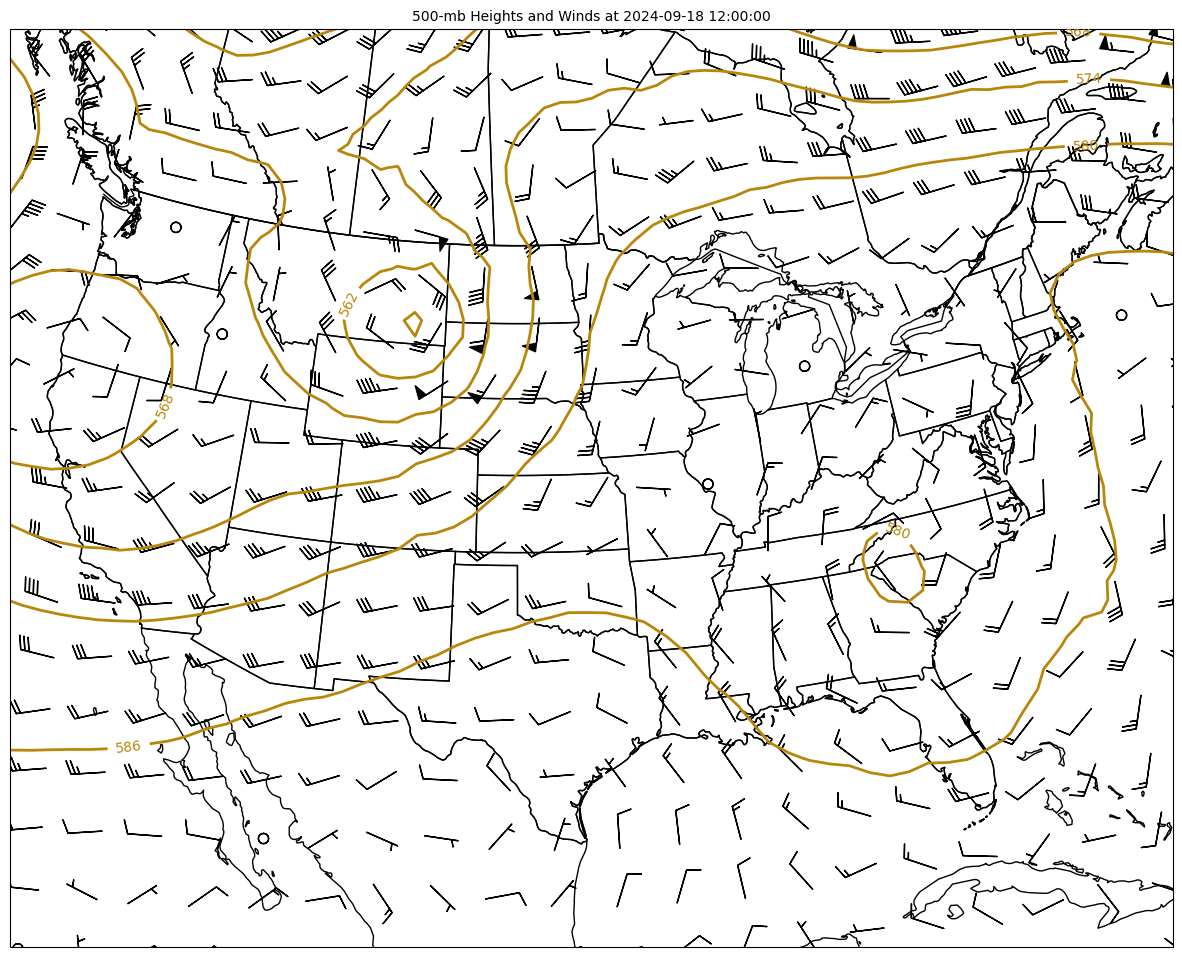

In [15]:
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()